In [1]:
from csv import DictReader

with open('octane_database.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    compounds = [r for r in reader]
csv_file.close()
print(len(compounds))

278


In [2]:
smiles = [c['canonical_smiles'] for c in compounds]
mon = [[float(c['properties.motor_octane_number.value'])] for c in compounds]
ron = [[float(c['properties.research_octane_number.value'])] for c in compounds]
os = [[ron[i][0] - mon[i][0]] for i in range(len(compounds))]

In [3]:
from sklearn.model_selection import train_test_split

mon_smiles_train, mon_smiles_test, mon_train, mon_test = train_test_split(smiles, mon, test_size=0.1, random_state=42)
ron_smiles_train, ron_smiles_test, ron_train, ron_test = train_test_split(smiles, ron, test_size=0.1, random_state=42)
os_smiles_train, os_smiles_test, os_train, os_test = train_test_split(smiles, os, test_size=0.1, random_state=42)

In [4]:
from ecnet.datasets import QSPRDataset

dataset_mon_train = QSPRDataset(mon_smiles_train, mon_train, backend='alvadesc')
dataset_mon_test = QSPRDataset(mon_smiles_test, mon_test, backend='alvadesc')
dataset_ron_train = QSPRDataset(ron_smiles_train, ron_train, backend='alvadesc')
dataset_ron_test = QSPRDataset(ron_smiles_test, ron_test, backend='alvadesc')
dataset_os_train = QSPRDataset(os_smiles_train, os_train, backend='alvadesc')
dataset_os_test = QSPRDataset(os_smiles_test, os_test, backend='alvadesc')

In [5]:
from ecnet.tasks import select_rfr

desc_idx_mon, desc_imp_mon = select_rfr(dataset_mon_train, total_importance=0.9999, n_estimators=25, n_jobs=4)
desc_idx_mon = desc_idx_mon[:250]
desc_imp_mon = desc_imp_mon[:250]

desc_idx_ron, desc_imp_ron = select_rfr(dataset_ron_train, total_importance=0.9999, n_estimators=25, n_jobs=4)
desc_idx_ron = desc_idx_ron[:250]
desc_imp_ron = desc_imp_ron[:250]

desc_idx_os, desc_imp_os = select_rfr(dataset_os_train, total_importance=0.9999, n_estimators=25, n_jobs=4)
desc_idx_os = desc_idx_os[:250]
desc_imp_os = desc_imp_os[:250]

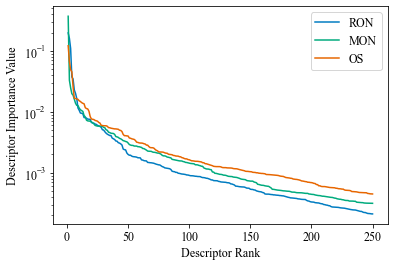

In [6]:
from matplotlib import pyplot as plt

n_desc = [i for i in range(1, 251)]
plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})
plt.yscale('log')
plt.xlabel('Descriptor Rank')
plt.ylabel('Descriptor Importance Value')
plt.plot(n_desc, desc_imp_ron, color=(0, 114/235, 178/235), label='RON')
plt.plot(n_desc, desc_imp_mon, color=(0, 158/235, 115/235), label='MON')
plt.plot(n_desc, desc_imp_os, color=(213/235, 94/235, 0), label='OS')
plt.legend(loc='upper right')
plt.show()